In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline # Only use this if using iPython

image_index = 7777 # You may select anything up to 60,000

print(y_train[image_index]) # The label is 8

plt.imshow(x_train[image_index], cmap='Greys')
x_train.shape

UsageError: unrecognized arguments: # Only use this if using iPython


In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division

x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.

x_train /= 255

x_test /= 255

print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=150)

print(y_train[0])
print(x_train[0])


plt.gray()
plt.imshow(x_train[0])

In [4]:
# Importing the required Keras modules containing model and layers

from keras.models import Sequential

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers

model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

model.add(Dense(128, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(optimizer='adam', 

              loss='sparse_categorical_crossentropy', 

              metrics=['accuracy'])

model.fit(x=x_train,y=y_train, epochs=10)


model.evaluate(x_test, y_test)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2031 - acc: 0.9387
Epoch 2/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0816 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0571 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0434 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0340 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0287 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0244 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0230 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0200 - acc: 0.9933:
Epoch 10/10
10000/10000 [=========================

[0.0824029982236083, 0.9817]

NameError: name 'img_rows' is not defined

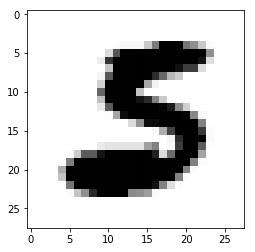

In [17]:
image_index =7777

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))

print(pred.argmax())